Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
Did people become happier from 2012 to 2014? Compute results for each country in the sample.
Who reported watching more TV in 2012, men or women?
Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [7]:
# Necessary imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Import parametric statistics
from scipy.stats import ttest_ind, f_oneway, ttest_rel, shapiro
# Import nonparametric statistics
from scipy.stats import kruskal, wilcoxon
# Import test for normality
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [8]:
data = pd.read_csv('ESSdata_Thinkful.csv')
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


Q1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

We are constructing histogram to see the trust variable for each country for each year

Distribution of trust


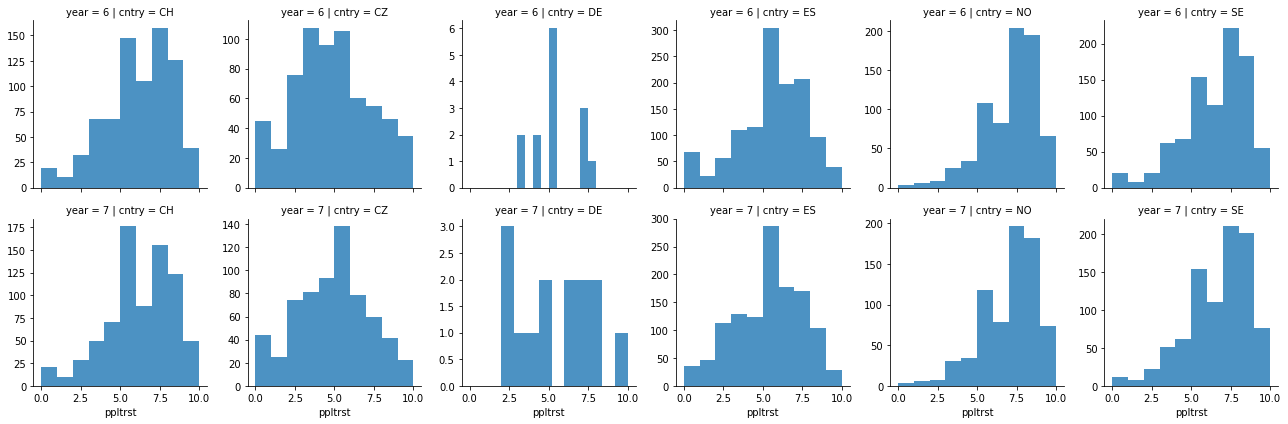

In [9]:
g = sns.FacetGrid(data, row = 'year', col = 'cntry', palette = 'pastel', dropna = True, sharey = False)
g = g.map(plt.hist, 'ppltrst', alpha=0.8)
print('Distribution of trust')
plt.show()

In [10]:
#testing each country and each year to determine if trust is normally distributed using shapiro wilk test
#creating list of countries an year
cntrys = list(data.cntry.unique())
years = [6,7]
print('Shapiro wilk test for normality')
for cnt in cntrys:
    ess = data[data.cntry==cnt].dropna()
    for year in years:
        print(cnt, year, shapiro(ess[ess.year==year].ppltrst))
    print()
    

Shapiro wilk test for normality
CH 6 (0.9517108201980591, 9.511383786695374e-15)
CH 7 (0.9547930955886841, 2.4654701498145852e-14)

CZ 6 (0.9680074453353882, 3.6126571179018185e-10)
CZ 7 (0.9715777039527893, 1.8779569010973773e-09)

DE 6 (0.8929170966148376, 0.1069343090057373)
DE 7 (0.9425466060638428, 0.4519253373146057)

ES 6 (0.949491024017334, 1.6942651933374377e-19)
ES 7 (0.9663601517677307, 1.5275811452092943e-15)

NO 6 (0.9211018085479736, 8.881221102071063e-19)
NO 7 (0.9292042255401611, 7.92943027973029e-18)

SE 6 (0.9367397427558899, 1.2586250953636158e-18)
SE 7 (0.9376322627067566, 1.3852298444033788e-18)



We can see that the values are not normally distributed
We will use wilcoxon signed rank test to see if there id difference between the distribution over both years

In [ ]:
# Wilcoxon Signed Rank Test for each country between years.
print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    # Isolating data from each country
    ess = data[data.cntry ==cnt]
    # Printing Shapiro test results
    print(cnt, wilcoxon(ess[ess.year == 6].ppltrst, 
                        y=ess[ess.year == 7].ppltrst))
    print()

According to wilcoxon signed rank test ES and SE are the two countries where the trust changed from 2012 to 2015

Q2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [ ]:
g = sns.FacetGrid(data, row = 'year', col = 'cntry', palette = 'pastel', dropna = True, sharey = False)
g = g.map(plt.hist, 'happy', alpha=0.8)
print('Distribution of happy')
plt.show()

#testing each country and each year to determine if trust is normally distributed using shapiro wilk test
#creating list of countries an year
cntrys = list(data.cntry.unique())
years = [6,7]
print('Shapiro wilk test for normality')
for cnt in cntrys:
    ess = data[data.cntry==cnt].dropna()
    for year in years:
        print(cnt, year, shapiro(ess[ess.year==year].happy))
    print()
    

We can see from the histograms thats all values are not normally distributed. We will use wilcoxon signed rank test to see if there is difference between the distribution over both years

In [ ]:
# Wilcoxon Signed Rank Test for each country between years.
print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    # Isolating data from each country
    ess = data[data.cntry ==cnt]
    # Printing Shapiro test results
    print(cnt, wilcoxon(ess[ess.year == 6].happy, 
                        y=ess[ess.year == 7].happy))
    print()

From the wilcoxon signed rank test above we can see that the values changed from 2012 to 2014 in CZ,ES and NO

Q3 Who reported watching more TV in 2012, men or women?

We can use t test since the two groups and independent

In [12]:
data_2012 = data[data.year==6]

Distribution of total TV Watching in 2012 for men and women


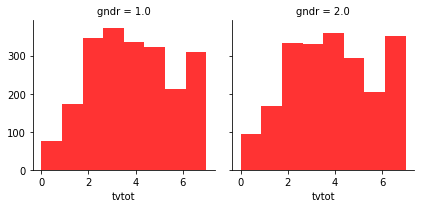

Males (1.0): (0.9434293508529663, 5.994494507539187e-28)
Females (2.0): (0.9390434622764587, 8.488309331265169e-29)


In [20]:
g = sns.FacetGrid(data_2012, col='gndr', dropna=True, sharey=True)
g = g.map(plt.hist, 'tvtot', alpha=0.8, color='red', bins=8)

print('Distribution of total TV Watching in 2012 for men and women')
plt.show()

print('Males (1.0):', shapiro(data_2012[data_2012.gndr ==1].tvtot.dropna()))
print('Females (2.0):', shapiro(data_2012[data_2012.gndr ==2].tvtot.dropna()))

Watching the histograms and the Shapiro-Wilks test results we can affirm that the distribution of men and women watching tv time is not normally distributed, therefore we will use the Wilcoxon Signed-Rank test to determine if the distributions are different.

Lets us see the count for each gender

In [15]:
data_2012[data_2012.gndr == 1].tvtot.dropna().count()

2151

In [16]:
data_2012[data_2012.gndr == 2].tvtot.dropna().count()

2140

In [17]:
# Printing Wilcoxon Test for TV watching across genders
print('Wilcoxon Test:', wilcoxon(data_2012[data_2012.gndr == 1].tvtot.dropna()[:2140], 
                                 y=data_2012[data_2012.gndr == 2].tvtot.dropna()))

Wilcoxon Test: WilcoxonResult(statistic=782530.0, pvalue=0.5033507782372963)


As the p-value is 0.5, above 0.05, we can affirm that there is not significant difference between the tv habits of men and women in this study.

In [ ]:
Q4 Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

C:\Users\18644\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\18644\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


		Distribution of Fairness in 2012 for People who Live with and without a Partner


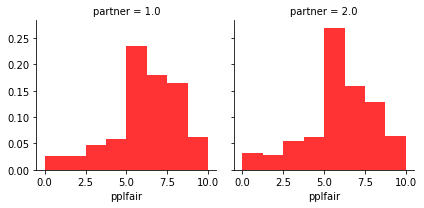

Lives with Partner (1.0): (0.9410251975059509, 2.4778057341886867e-31)
Lives Alone (2.0): (1.0, 1.0)


C:\Users\18644\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1306: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [25]:
g = sns.FacetGrid(data_2012, col='partner', dropna=True, sharey=True)
g = g.map(plt.hist, 'pplfair', alpha=0.8, color='red', bins=8, normed=True)

print('\t\tDistribution of Fairness in 2012 for People who Live with and without a Partner')
plt.show()

print('Lives with Partner (1.0):', shapiro(data_2012[data_2012.partner ==1].pplfair.dropna()))
print('Lives Alone (2.0):', shapiro(data_2012[data_2012 ==2].pplfair.dropna()))

Watching the histograms and the Shapiro-Wilks test results we can affirm that the distribution the values is not normal, therefore we will use the Wilcoxon Signed-Rank test to determine if the distributions are different.

In [27]:
#Now we will find the count for each gender
data_2012[data_2012.partner == 1].pplfair.dropna().count()

2663

In [28]:
data_2012[data_2012.partner==2].pplfair.dropna().count()

1608

In [29]:
# Printing Wilcoxon Test for fairness across living with and without partners.  
# Using only first 1608 entries of living with partners to even counts.
print('Wilcoxon Test:', wilcoxon(data_2012[data_2012.partner == 1].pplfair.dropna()[:1608], 
                                 y=data_2012[data_2012.partner == 2].pplfair.dropna()))

Wilcoxon Test: WilcoxonResult(statistic=426739.0, pvalue=0.004340158276254172)


The p value shows that there is significant difference among people living alone and with a partner in believing people were fair in 2012.
Now let us calculate the median which group had higher median value of belief in fairness.

In [31]:
print('Median fairness of people living with partner:',  data_2012[data_2012.partner==1].pplfair.median())
print('Median fairness of people living alone:', data_2012[data_2012.partner==2].pplfair.median())


Median fairness of people living with partner: 7.0
Median fairness of people living alone: 6.0


Hence, people living with partner had a belief that people were fair in 2012 compared to people living alone

Q5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [36]:
country_list = ['CH', 'CZ', 'ES', 'NO']
data_c = data[data.cntry.isin(country_list)& (data.year == 7)]

		Distribution of Social Meetings from 2014 for Four European Countries


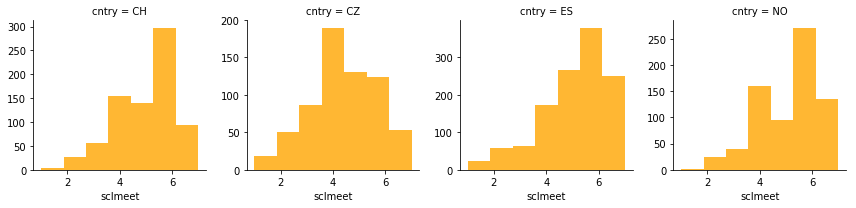

Shapiro Tests for Normality
CH (0.8974164724349976, 2.7436334896806913e-22)

CZ (0.9451602101325989, 7.663770300607355e-15)

ES (0.8880351781845093, 9.848293928138278e-29)

NO (0.8881818056106567, 1.422473605641294e-22)



In [37]:
# Plotting histograms of happiness for each country for each year
g = sns.FacetGrid(data_c, col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'sclmeet', alpha=0.8, color='orange', bins=7)

print('\t\tDistribution of Social Meetings from 2014 for Four European Countries')
plt.show()

# Testing each country and each year to determine if happiness is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(data_c.cntry.unique())
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    print(cnt, shapiro(data_c[data_c.cntry ==cnt].sclmeet.dropna()))
    # Printing Shapiro test results
    print()

Watching the histograms and the Shapiro-Wilks test results we can affirm that the distribution of the values are not normal. I will usea non parametric test Kruskal Wallis

In [38]:
# Printing Kruskal test statistic
print(kruskal(data_c[data_c.cntry == 'CH'].sclmeet.dropna(),
             data_c[data_c.cntry == 'CZ'].sclmeet.dropna(),
             data_c[data_c.cntry == 'ES'].sclmeet.dropna(),
             data_c[data_c.cntry == 'NO'].sclmeet.dropna()))

KruskalResult(statistic=169.44369492694958, pvalue=1.6778868334382967e-36)


We can see that the distributions of social meetings are different from one another. We need to run t-tests for all distributions against each other to determine which ones are the different.

In [40]:

# Printing all combinations of t-tests
print('CH vs CZ:', ttest_ind(data_c[data_c.cntry == 'CH'].sclmeet.dropna(),
             data_c[data_c.cntry == 'CZ'].sclmeet.dropna()))
print('CH vs ES:', ttest_ind(data_c[data_c.cntry == 'CH'].sclmeet.dropna(),
             data_c[data_c.cntry == 'ES'].sclmeet.dropna()))
print('CH vs NO:', ttest_ind(data_c[data_c.cntry == 'CH'].sclmeet.dropna(),
             data_c[data_c.cntry == 'NO'].sclmeet.dropna()))
print('CZ vs ES:', ttest_ind(data_c[data_c.cntry == 'CZ'].sclmeet.dropna(),
             data_c[data_c.cntry == 'ES'].sclmeet.dropna()))
print('CZ vs NO:', ttest_ind(data_c[data_c.cntry == 'CZ'].sclmeet.dropna(),
             data_c[data_c.cntry == 'NO'].sclmeet.dropna()))
print('ES vs NO:', ttest_ind(data_c[data_c.cntry == 'ES'].sclmeet.dropna(),
             data_c[data_c.cntry == 'NO'].sclmeet.dropna()))

CH vs CZ: Ttest_indResult(statistic=9.675850699914886, pvalue=1.7204743885392493e-21)
CH vs ES: Ttest_indResult(statistic=-1.5343317353073618, pvalue=0.12510774525042745)
CH vs NO: Ttest_indResult(statistic=-2.067962986557216, pvalue=0.03881448528868391)
CZ vs ES: Ttest_indResult(statistic=-11.400026538179093, pvalue=3.7676844407353374e-29)
CZ vs NO: Ttest_indResult(statistic=-11.269186128577815, pvalue=3.0334022155191707e-28)
ES vs NO: Ttest_indResult(statistic=-0.632916395870007, pvalue=0.5268628350318294)


CH and NO are not significantly different
ES and No are slighlty different
CZ is significantly different from ES and NO
CH is significantly different from CZ and ES